<a href="https://colab.research.google.com/github/Nandini-55/AI-Machine_Learning_Journey/blob/main/Supervised%20Machine%20Learning/Iris_dataset_ROC_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import plotly.express as px

df=px.data.iris()

fig=px.line(df,x="species",y="petal_width")

fig.show()

In [ ]:
print(df.head(130))

     sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
125           7.2          3.2           6.0          1.8  virginica   
126           6.2          2.8           4.8          1.8  virginica   
127           6.1          3.0           4.9          1.8  virginica   
128           6.4          2.8           5.6          2.1  virginica   
129           7.2          3.0           5.8          1.6  virginica   

     species_id  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
125      

In [ ]:
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     species_id  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
145      

In [ ]:
df.to_csv('iris_dataset.csv',index=False)
print("Dataset saved to iris_dataset.csv")

Dataset saved to iris_dataset.csv


In [ ]:
#Print the no. of samples in each category
num_categories = df['species'].value_counts()
print("Number of samples in each category: ")
print(num_categories)

Number of samples in each category: 
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [ ]:
#Select the four features
features = df[['sepal_length','sepal_width','petal_length','petal_width']]
#print all data for the four features
print("Four features of the Iris dataset : ")
print(features)

Four features of the Iris dataset : 
     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score ,  classification_report,roc_curve,auc ,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler ,LabelBinarizer
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#Load the Iris dataset
df = px.data.iris()

#prepare features x and target y
X=df[['sepal_length','sepal_width','petal_length','petal_width']]
y=df['species']

#split the dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Standardise the features
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

#Train the SVM model
svm=SVC(kernel='linear',probability=True,random_state=42)
svm.fit(X_train_scaled,y_train)

#Make predictions on the test set
y_pred=svm.predict(X_test_scaled)

#Evaluate the model
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy for svm :{accuracy:.2f}")
print("/n Classification Report:")
print(classification_report(y_test,y_pred))

# #knn
# knn_model = KNeighborsClassifier(n_neighbors=3)
# knn_model.fit(X_train_scaled, y_train)
# Y_pred_knn = knn_model.predict(X_test_scaled)

# print("Classification Report:\n", classification_report(y_test, Y_pred_knn))
# print(f"Accuracy for knn : {accuracy_score(y_test, Y_pred_knn)}")


# logistic_model= LogisticRegression()
# logistic_model.fit(X_train_scaled, y_train)
# Y_pred_logistic = logistic_model.predict(X_test_scaled)

# print("Classification Report:\n", classification_report(y_test, Y_pred_logistic))
# print(f"Accuracy for logistic : {accuracy_score(y_test, Y_pred_logistic)}")
#paired t-test- over accuracy


Accuracy for svm :0.97
/n Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



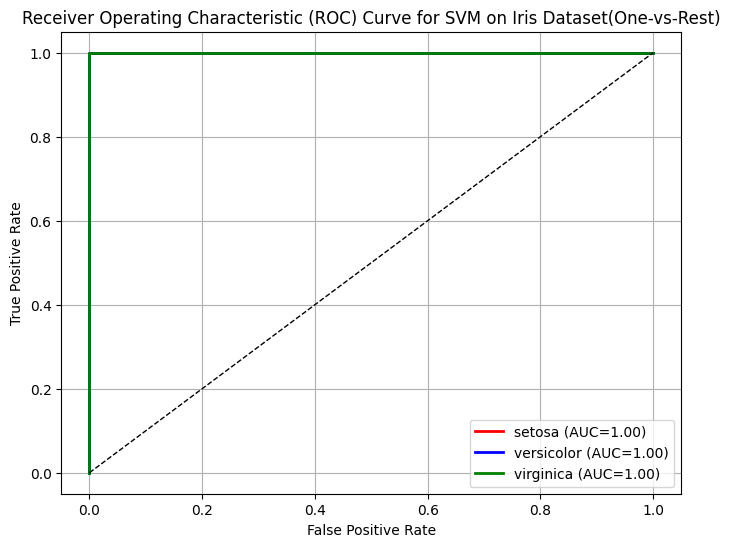

In [ ]:
#Binarize the labels for ROC(one-vs-rest)
label_binarize=LabelBinarizer()
y_test_bin=label_binarize.fit_transform(y_test)
y_score=svm.predict_proba(X_test_scaled)

#Plot ROC curves for each class
plt.figure(figsize=(8,6))
colors =['red','blue','green']
classes=['setosa','versicolor','virginica']

for i in range(3):
  #Compute ROC curve and AUC for class i
  fpr,tpr,_=roc_curve(y_test_bin[:,i],y_score[:,i])
  roc_auc=auc(fpr,tpr)

  #Plot ROC curve
  plt.plot(fpr,tpr ,color=colors[i],lw=2,label=f'{classes[i]} (AUC={roc_auc:.2f})')

#Plot diagonal line (random guessing )
plt.plot([0,1],[0,1],color='black',lw=1,linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM on Iris Dataset(One-vs-Rest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

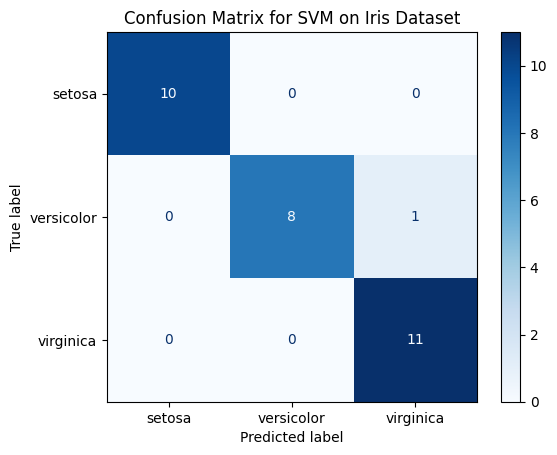

In [ ]:
#Plot confusion matrix

cm = confusion_matrix(y_test, y_pred,labels=['setosa','versicolor','virginica'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['setosa','versicolor','virginica'])
plt.figure(figsize=(8,6))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SVM on Iris Dataset")
plt.show()
